In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv


In [2]:
# thanks to:
#https://www.kaggle.com/shawon10/covid-19-easy-data-analysis-for-beginners
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [3]:
#df=pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv', na_filter=False)
df=pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv', index_col='Date', parse_dates=True)
# df=df.drop(['UID'],axis=1)
#df=pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv', parse_dates=True)
df.head(10)

df_usa = df

In [4]:
def plotLineByDate(df, label, key):
    group = df.groupby('Date')[key].sum().reset_index()

    fig = px.line(group, x="Date", y=key, 
                  title=label + " " + key + " Cases Over Time")

    fig.show()

In [5]:
kansas_city_ks=df.loc[(df['Combined_Key'] == 'Wyandotte, Kansas, US') | 
                   (df['Combined_Key'] == 'Douglas, Kansas, US') | 
                   (df['Combined_Key'] == 'Johnson, Kansas, US')]
kansas_city_ks.tail(5)
plotLineByDate(kansas_city_ks, "Kansas City, Kansas", "Confirmed")

In [6]:
# Montgomery, maryland
montgomery_md=df.loc[df['Combined_Key'] == 'Montgomery, Maryland, US']
montgomery_md.head(30)
plotLineByDate(montgomery_md, "Montgomery, Maryland", "Confirmed")

In [7]:
#columbus, ohio - Franklin Delaware Fairfield 
columbus_oh=df.loc[(df['Combined_Key'] == 'Franklin, Ohio, US') | 
                   (df['Combined_Key'] == 'Delaware, Ohio, US') | 
                   (df['Combined_Key'] == 'Fairfield, Ohio, US')]
columbus_oh.tail(5)
plotLineByDate(columbus_oh, "Columbus, Ohio", "Confirmed")

In [8]:
#youngstown, ohio - Mahoning
youngstown_oh=df.loc[df['Admin2'] == 'Mahoning']
youngstown_oh.tail(5)
plotLineByDate(youngstown_oh, "Youngstown, Ohio", "Confirmed")

In [9]:
# Pittsburg - Allegheny
pittsburg_pa=df.loc[df['Admin2'] == 'Allegheny']
pittsburg_pa.tail(5)
plotLineByDate(pittsburg_pa, "Pittsburg, PA", "Confirmed")

In [10]:
# Haymarket - Prince William
haymarket_va=df.loc[df['Admin2'] == 'Prince William']
haymarket_va.tail(5)
plotLineByDate(haymarket_va, "Prince William County, VA", "Confirmed")

In [11]:
#Virginia Beach, Virginia
virginia_beach_va=df.loc[(df['Combined_Key'] == 'Virginia Beach, Virginia, US') | 
                         (df['Combined_Key'] == 'Chesapeake, Virginia, US') | 
                         (df['Combined_Key'] == 'Norfolk, Virginia, US')]
virginia_beach_va.tail(5)
plotLineByDate(virginia_beach_va, "Virginia Beach, Norfolk, Chesapeake, VA", "Confirmed")

In [13]:
#king, WA
king_wa=df.loc[(df['Combined_Key'] == 'King, Washington, US')]
king_wa.tail(5) # 4/1/20
# seatle_wa=df.loc[(df['Combined_Key'] == 'King, Washington, US') | 
#                     (df['Combined_Key'] == 'Snohomish, Washington, US')]
# #seatle_wa.head(5) # 1/22/20
# seatle_wa.tail(5) # 4/1/20
plotLineByDate(king_wa, "King County, WA", "Confirmed")

In [14]:
#Snohomish, WA
snohomish_wa=df.loc[(df['Combined_Key'] == 'Snohomish, Washington, US')]
snohomish_wa.tail(5)
plotLineByDate(snohomish_wa, "Snohomish, WA", "Confirmed")
plotLineByDate(snohomish_wa, "Snohomish, WA", "Deaths")

In [28]:
def plotKey2LineByDate(df, label, key1, key2):

    group_c = df.groupby('Date')[key1].sum().reset_index()
    group_d = df.groupby('Date')[key2].sum().reset_index()
    
    # gca stands for 'get current axis'
    ax = plt.gca()
    group_c.plot(kind='line',x='Date',y=key1,ax=ax)
    group_d.plot(kind='line',x='Date',y=key2,ax=ax)

    plt.savefig(label + '_20200407.png')
    plt.show()


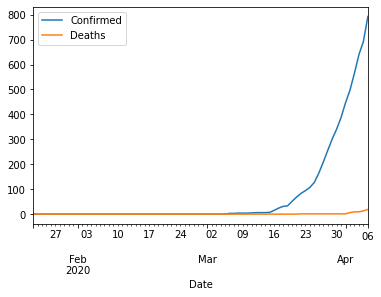

In [29]:
plotKey2LineByDate(montgomery_md, 'Montgomery County, Maryland', 'Confirmed', 'Deaths')

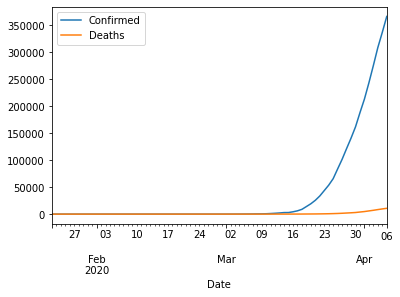

In [30]:
plotKey2LineByDate(df_usa, 'USA', 'Confirmed', 'Deaths')

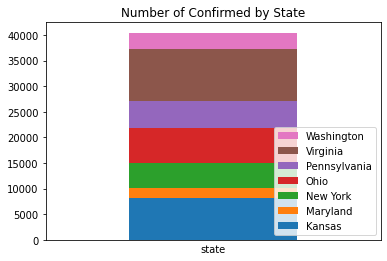

In [23]:
# extract states of interest from USA overall
df = df_usa
df=df_usa.loc[(df['Province_State'] == 'Kansas') | 
              (df['Province_State'] == 'Maryland') | 
              (df['Province_State'] == 'Ohio') |
              (df['Province_State'] == 'Pennsylvania') | 
              (df['Province_State'] == 'Virginia') | 
              (df['Province_State'] == 'Washington') | 
              (df['Province_State'] == 'New York') ]
#df.tail(20)
              # df=df_usa.loc[(df['Combined_Key'] == 'Wyandotte, Kansas, US') | 
#               (df['Combined_Key'] == 'Douglas, Kansas, US') | 
#               (df['Combined_Key'] == 'Johnson, Kansas, US') |
#               (df['Combined_Key'] == 'Montgomery, Maryland, US') | 
#               (df['Combined_Key'] == 'Franklin, Ohio, US') | 
#               (df['Combined_Key'] == 'Delaware, Ohio, US') | 
#               (df['Combined_Key'] == 'Fairfield, Ohio, US') ]

#               (df['Admin2'] == 'Mahoning') |
#               (df['Admin2'] == 'Allegheny') |
#               (df['Admin2'] == 'Prince William') |
#               (df['Combined_Key'] == 'Virginia Beach, Virginia, US') | 
#               (df['Combined_Key'] == 'Chesapeake, Virginia, US') | 
#               (df['Combined_Key'] == 'Norfolk, Virginia, US') |
#               (df['Combined_Key'] == 'King, Washington, US') |
#               (df['Combined_Key'] == 'Snohomish, Washington, US') ]

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
    ['dummy','Province_State']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
#   ['dummy','Province_State']
#   ['dummy',('Province_State'=="WA") | ('Province_State'=="NY")]
#   ['dummy',(('Province_State'=='WA') | ('Province_State'=='NY'))]

plt.title('Number of Confirmed by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['Province_State'].unique())

# labels & legends are WRONG!
#plt.legend(current_handles,labels,loc='lower right')
plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

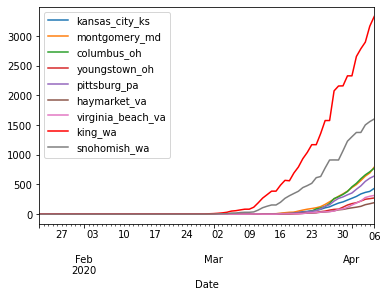

In [25]:
group_k = kansas_city_ks.groupby('Date')['Confirmed'].sum().reset_index()
group_m = montgomery_md.groupby('Date')['Confirmed'].sum().reset_index()
group_o1 = columbus_oh.groupby('Date')['Confirmed'].sum().reset_index()
group_o2 = youngstown_oh.groupby('Date')['Confirmed'].sum().reset_index()
group_p = pittsburg_pa.groupby('Date')['Confirmed'].sum().reset_index()
group_v1 = haymarket_va.groupby('Date')['Confirmed'].sum().reset_index()
group_v2 = virginia_beach_va.groupby('Date')['Confirmed'].sum().reset_index()
group_w1 = king_wa.groupby('Date')['Confirmed'].sum().reset_index()
group_w2 = snohomish_wa.groupby('Date')['Confirmed'].sum().reset_index()

# gca stands for 'get current axis'
ax = plt.gca()

group_k.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="kansas_city_ks")
group_m.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="montgomery_md")
group_o1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="columbus_oh")
group_o2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="youngstown_oh")
group_p.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="pittsburg_pa")
group_v1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="haymarket_va")
group_v2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="virginia_beach_va")
group_w1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="king_wa", color='red')
group_w2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="snohomish_wa")
#df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)

plt.savefig("US_Selected_Counties" + '_20200407.png')
plt.show()

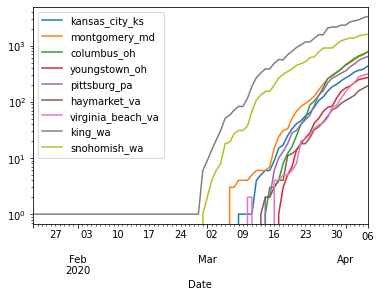

In [32]:
# gca stands for 'get current axis'
ax = plt.gca()

# log scale
group_k.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="kansas_city_ks", loglog=True)
group_m.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="montgomery_md", loglog=True)
group_o1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="columbus_oh", loglog=True)
group_o2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="youngstown_oh", loglog=True)
group_p.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="pittsburg_pa", loglog=True)
group_v1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="haymarket_va", loglog=True)
group_v2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="virginia_beach_va", loglog=True)
group_w1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="king_wa", loglog=True)
group_w2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="snohomish_wa", loglog=True)

#group_c.plot(kind='line',x='Date',y='Confirmed',ax=ax)
#group_d.plot(kind='line',x='Date',y='Deaths',ax=ax)
#df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)

plt.savefig('loglog_20200407.png')
plt.show()

In [ ]:
# gca stands for 'get current axis'
ax = plt.gca()

# log scale
group_k.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="kansas_city_ks", logy=True)
group_m.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="montgomery_md", logy=True)
group_o1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="columbus_oh", logy=True)
group_o2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="youngstown_oh", logy=True)
group_p.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="pittsburg_pa", logy=True)
group_v1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="haymarket_va", logy=True)
group_v2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="virginia_beach_va", logy=True)
group_w1.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="king_wa", logy=True)
group_w2.plot(kind='line',x='Date',y='Confirmed',ax=ax, label="snohomish_wa", logy=True)

#df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)

plt.savefig('logy_20200407.png')
plt.show()